![title](images_ebac.png)

___

## **Curso**: Cientista de Dados 
## **Aluno**: Victor Resende

___

# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

### Instalando pacotes:

In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### Carregando pacotes:

In [8]:
from pandas_datareader import data as web
import yfinance as yf

import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

### Carregando e salvando dados:

In [28]:
# Definindo os ativos e a data de início:
ativos = ['^BVSP', 'ITUB3.SA', 'PETR4.SA']
dt_ini = '2016-01-01'

# Baixando os dados dos ativos:
dados = yf.download(ativos, start=dt_ini)

# Salvando em CSV:
dados.to_csv('dados_ativos_yahoo.csv')

# Visualizando os dados:
dados.head()


[*********************100%***********************]  3 of 3 completed


Price                     Adj Close                         Close           \
Ticker                     ITUB3.SA  PETR4.SA    ^BVSP   ITUB3.SA PETR4.SA   
Date                                                                         
2016-01-04 00:00:00+00:00  9.448958  2.205173  42141.0  14.000000     6.87   
2016-01-05 00:00:00+00:00  9.649387  2.144186  42419.0  14.296969     6.68   
2016-01-06 00:00:00+00:00  9.592123  2.054309  41773.0  14.212121     6.40   
2016-01-07 00:00:00+00:00  9.477590  2.009371  40695.0  14.042424     6.26   
2016-01-08 00:00:00+00:00  9.624847  2.012581  40612.0  14.260606     6.27   

Price                                    High                          Low  \
Ticker                       ^BVSP   ITUB3.SA PETR4.SA    ^BVSP   ITUB3.SA   
Date                                                                         
2016-01-04 00:00:00+00:00  42141.0  14.769696     7.03  43349.0  14.000000   
2016-01-05 00:00:00+00:00  42419.0  14.327272     7.00  42534.0  14.042424   
2016-01-06 00:00:00+00:00  41773.0  14.406060     6.54  42410.0  13.939393   
2016-01-07 00:00:00+00:00  40695.0  14.151515     6.43  41772.0  13.903030   
2016-01-08 00:00:00+00:00  40612.0  14.260606     6.45  41218.0  13.963636   

Price                                             Open                    \
Ticker                    PETR4.SA    ^BVSP   ITUB3.SA PETR4.SA    ^BVSP   
Date                                                                       
2016-01-04 00:00:00+00:00     6.55  42125.0  14.769696     6.57  43349.0   
2016-01-05 00:00:00+00:00     6.62  42137.0  14.212121     6.92  42139.0   
2016-01-06 00:00:00+00:00     6.40  41590.0  14.236363     6.53  42410.0   
2016-01-07 00:00:00+00:00     6.08  40695.0  14.036363     6.19  41772.0   
2016-01-08 00:00:00+00:00     6.13  40463.0  14.175757     6.38  40695.0   

Price                       Volume                       
Ticker                    ITUB3.SA  PETR4.SA      ^BVSP  
Date                                                     
2016-01-04 00:00:00+00:00   278520  45962100  2976300.0  
2016-01-05 00:00:00+00:00    99825  29446700  2557200.0  
2016-01-06 00:00:00+00:00   181995  67507200  3935900.0  
2016-01-07 00:00:00+00:00   221925  57387900  4032300.0  
2016-01-08 00:00:00+00:00   122100  52100300  3221600.0

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

C:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



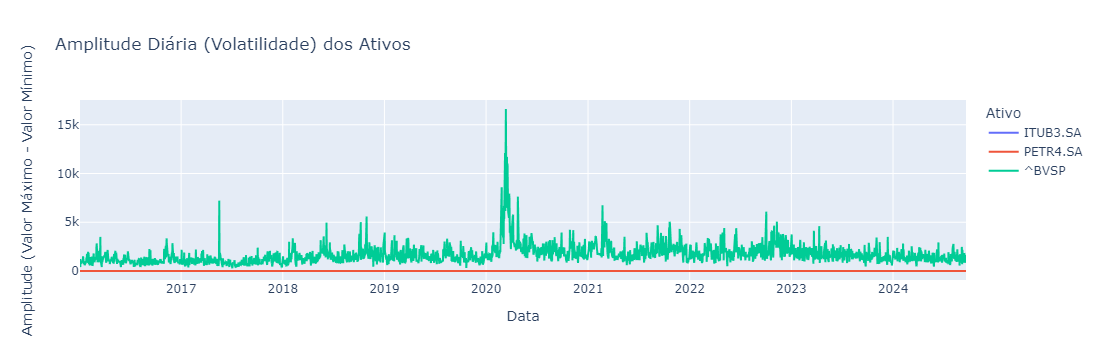

In [32]:
# Recarregando os dados:
dados = pd.read_csv('dados_ativos_yahoo.csv', header=[0, 1], index_col=0, parse_dates=True)

# Calculando a volatilidade (amplitude diária) para cada ativo:
amplitude = dados['High'] - dados['Low']

# Organizando o DataFrame para Plotly (transformar colunas multi-index em colunas simples):
amplitude = amplitude.reset_index()

# Transformando em formato "long" (necessário para Plotly Express):
amplitude_long = amplitude.melt(id_vars='Date', var_name='Ativo', value_name='Amplitude')

# Criando gráfico de linha interativo:
fig = px.line(amplitude_long, x='Date', y='Amplitude', color='Ativo', title='Amplitude Diária (Volatilidade) dos Ativos')
fig.update_layout(xaxis_title='Data', yaxis_title='Amplitude (Valor Máximo - Valor Mínimo)')
fig.show()


In [36]:
# DataFrame com os valores máximo (High) e mínimo (Low) de cada ativo:
max_min_df = dados[['High', 'Low']]

# Exibindo o DataFrame com os valores máximos e mínimos:
max_min_df.head()


Price                           High                          Low           \
Ticker                      ITUB3.SA PETR4.SA    ^BVSP   ITUB3.SA PETR4.SA   
Date                                                                         
2016-01-04 00:00:00+00:00  14.769696     7.03  43349.0  14.000000     6.55   
2016-01-05 00:00:00+00:00  14.327272     7.00  42534.0  14.042424     6.62   
2016-01-06 00:00:00+00:00  14.406060     6.54  42410.0  13.939393     6.40   
2016-01-07 00:00:00+00:00  14.151515     6.43  41772.0  13.903030     6.08   
2016-01-08 00:00:00+00:00  14.260606     6.45  41218.0  13.963636     6.13   

Price                               
Ticker                       ^BVSP  
Date                                
2016-01-04 00:00:00+00:00  42125.0  
2016-01-05 00:00:00+00:00  42137.0  
2016-01-06 00:00:00+00:00  41590.0  
2016-01-07 00:00:00+00:00  40695.0  
2016-01-08 00:00:00+00:00  40463.0

### Análise:

Comparando os três ativos, constatamos que o BVSP apresentou maior volatilidade entre os anos de 2020 e 2021.

### Outras alternativas de gráficos interativos:

### Gráfico de barras empilhadas:
Esse gráfico permite comparar a amplitude de variação empilhando os valores máximos e mínimos.

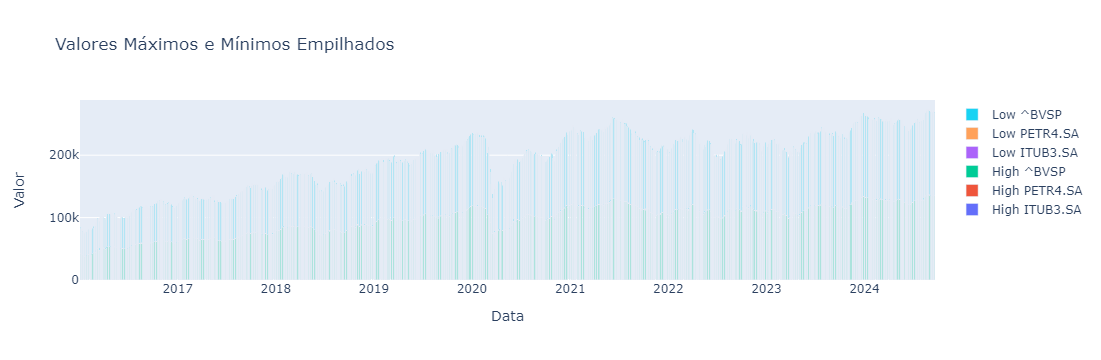

In [38]:
import plotly.graph_objects as go

# Criando o gráfico de barras empilhadas:
fig = go.Figure()

# Adicionando as barras para o valor máximo (High):
for ativo in max_min_df['High'].columns:
    fig.add_trace(go.Bar(x=max_min_df.index, y=max_min_df['High'][ativo], name=f'High {ativo}'))

# Adicionando as barras para o valor mínimo (Low):
for ativo in max_min_df['Low'].columns:
    fig.add_trace(go.Bar(x=max_min_df.index, y=max_min_df['Low'][ativo], name=f'Low {ativo}'))

# Ajustando layout:
fig.update_layout(barmode='stack', title='Valores Máximos e Mínimos Empilhados', xaxis_title='Data', yaxis_title='Valor')

# Mostrando o gráfico:
fig.show()


### Gráfico de área:
Esse gráfico de área destaca visualmente a diferença entre o valor mínimo e máximo ao longo do tempo.

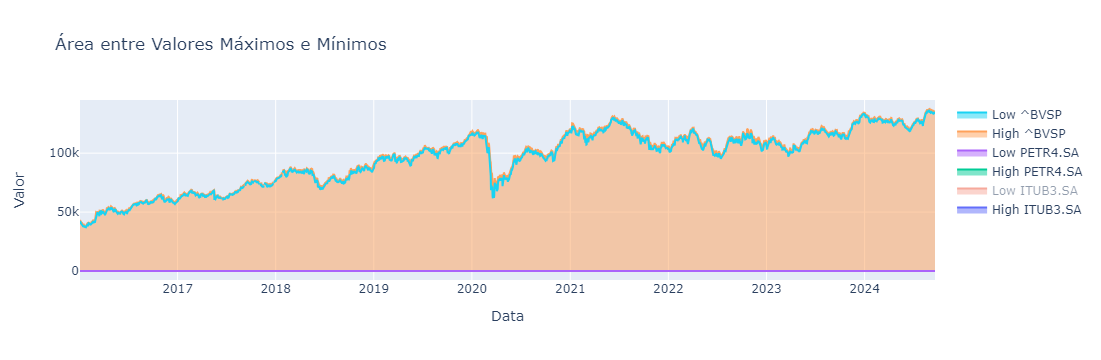

In [43]:
# Criando o gráfico de área:
fig = go.Figure()

# Adicionando as áreas para cada ativo:
for ativo in max_min_df['High'].columns:
    fig.add_trace(go.Scatter(x=max_min_df.index, y=max_min_df['High'][ativo], fill='tonexty', name=f'High {ativo}'))
    fig.add_trace(go.Scatter(x=max_min_df.index, y=max_min_df['Low'][ativo], fill='tonexty', name=f'Low {ativo}'))

# Ajustando layout:
fig.update_layout(title='Área entre Valores Máximos e Mínimos', xaxis_title='Data', yaxis_title='Valor')

# Mostrando o gráfico:
fig.show()


_____